# Visualization of bird sound files

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import os
from pydub import AudioSegment
from scipy.io import wavfile

In [2]:
# custom matplotlib style
usetex = True
fontsize = 16
params = {'axes.labelsize': fontsize + 2,
      'font.size': fontsize + 2,
      'legend.fontsize': fontsize + 2,
      'xtick.labelsize': fontsize,
      'ytick.labelsize': fontsize,
      'text.usetex': usetex}
plt.style.use('ggplot')
plt.rcParams.update(params)

### Conversion: MP3 to WAV

Here, we take all the MP3 bird sounds inside the "ALL BIRDS" folder, and convert them into WAV files. 

We have to do this because WAV is the most supported format to do sound processing.

<div class='alert alert-warning'>
This step will take some minutes. 
<div>

In [18]:
# Read the ALL BIRDS folder
folder_path = 'ALL BIRDS'
files = os.listdir(folder_path)

# Create folder for the WAV files
if not os.path.exists('all_birds_wav'):
        os.makedirs('all_birds_wav')
        
# Convert all sounds
for file in files:
    sound_id = file.split('-')[-1].split('.')[0]
    sound = AudioSegment.from_mp3(os.path.join(folder_path, file))
    output_path = os.path.join('all_birds_wav', sound_id + '.wav')
    sound.export(output_path, format='wav')

### Visualize some sound files as a signals

In [81]:
folder_path = 'all_birds_wav'
files = os.listdir(folder_path)

sounds = []
for i in range(1, 9):    
    # Read WAV file
    f = os.path.join(folder_path, files[i])
    rate, data = wavfile.read(f)
    sounds.append(data)

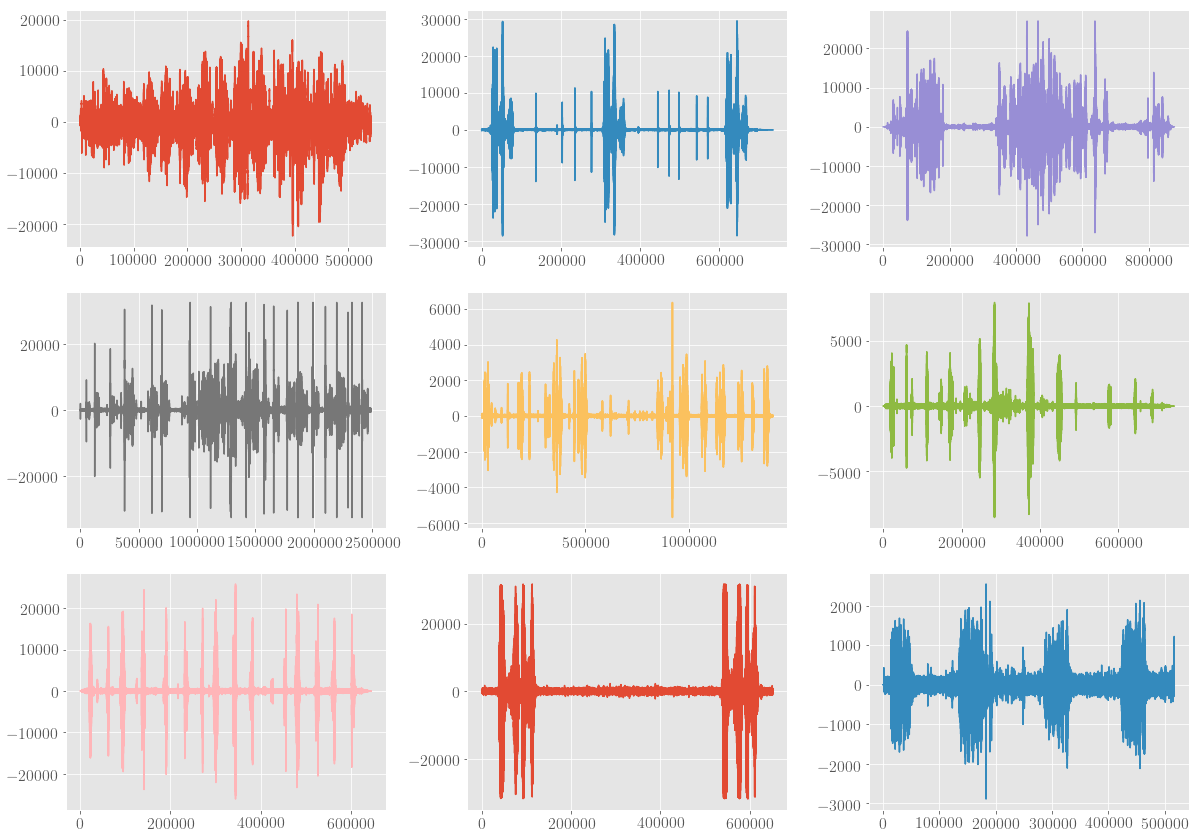

In [98]:
# visualize the signals
fig = plt.figure(figsize=(17,12))
for idx, sound in enumerate(sounds):
    ax = fig.add_subplot(3, 3, idx+1)
    ax.plot(sound, c="C{}".format(idx))
    
plt.tight_layout()
plt.show()